In [ ]:
%load_ext dotenv
%dotenv

In [15]:
from binance.client import Client
from dotenv import load_dotenv
import os

load_dotenv()  # 환경 변수 로드
api_key = os.getenv('Binan_API_KEY')
api_secret = os.getenv('Binan_SECRET_KEY')
# 환경 변수 값 확인

client = Client(api_key, api_secret)

# Get asset balance
balance = client.get_asset_balance(asset='XRP')
print('XRP balance :', balance)
account_info = client.get_account()
print(account_info)

XRP balance : {'asset': 'XRP', 'free': '0.06760100', 'locked': '0.00000000'}
{'makerCommission': 10, 'takerCommission': 10, 'buyerCommission': 0, 'sellerCommission': 0, 'commissionRates': {'maker': '0.00100000', 'taker': '0.00100000', 'buyer': '0.00000000', 'seller': '0.00000000'}, 'canTrade': True, 'canWithdraw': True, 'canDeposit': True, 'brokered': False, 'requireSelfTradePrevention': False, 'preventSor': False, 'updateTime': 1701690294365, 'accountType': 'SPOT', 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'}, {'a

In [18]:
import time

# Binance 서버 시간 가져오기
server_time = client.get_server_time()
server_timestamp = server_time['serverTime']

# 현재 시간을 가져와 타임스탬프로 변환하기
current_time = int(time.time() * 1000)

# 타임스탬프 확인하기
print('Server timestamp:', server_timestamp)
print('Current timestamp:', current_time)

# 이더리움 계정 정보 가져오기
account_info = client.get_account(timestamp=current_time)


# account_info = client.get_account()
eth_balance = None
for balance in account_info['balances']:
    if balance['asset'] == 'XRP':
        eth_balance = balance['free']
        print('ETH balance:', eth_balance)
        break

Server timestamp: 1701755560677
Current timestamp: 1701755560884
ETH balance: 0.06760100


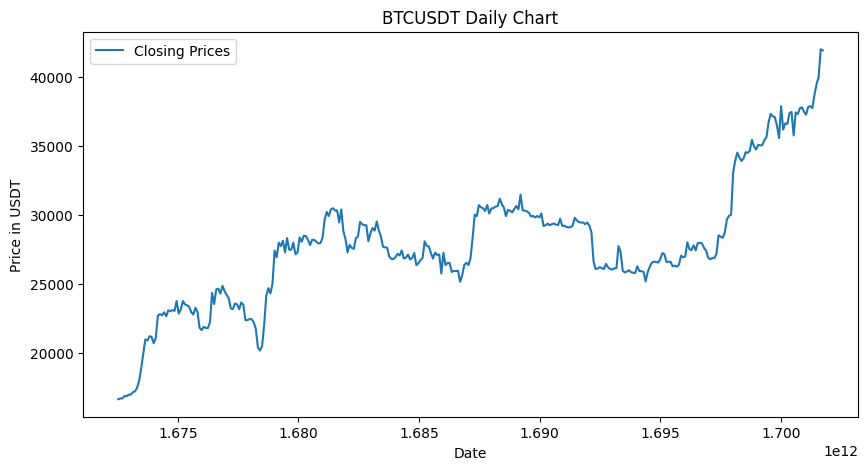

In [19]:
import matplotlib.pyplot as plt


candles = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan, 2023")

# 데이터 추출
dates = [x[0] for x in candles]
opens = [float(x[1]) for x in candles]
highs = [float(x[2]) for x in candles]
lows = [float(x[3]) for x in candles]
closes = [float(x[4]) for x in candles]

# 차트 시각화
plt.figure(figsize=(10, 5))
plt.plot(dates, closes, label="Closing Prices")
plt.title("BTCUSDT Daily Chart")
plt.xlabel("Date")
plt.ylabel("Price in USDT")
plt.legend()
plt.show()

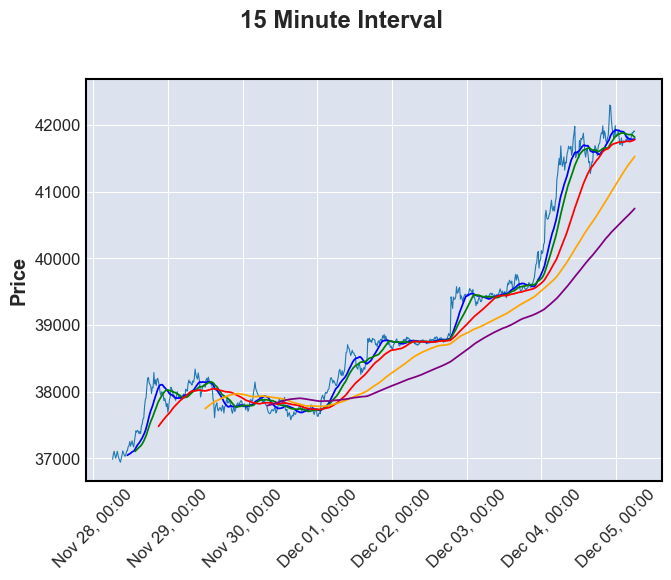

In [31]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
from binance.client import Client
from dotenv import load_dotenv
import os

load_dotenv()  # 환경 변수 로드
api_key = os.getenv('Binan_API_KEY')
api_secret = os.getenv('Binan_SECRET_KEY')

client = Client(api_key, api_secret)
# 데이터 가져오기 함수

# 데이터 가져오기 함수
def get_data(symbol, interval, start, end=None):
    candles = client.get_historical_klines(symbol, interval, start, end)
    dates = [x[0] for x in candles]
    data = [x[1:5] for x in candles]  # Open, High, Low, Close
    df = pd.DataFrame(data, index=pd.to_datetime(dates, unit='ms'), columns=['Open', 'High', 'Low', 'Close']).astype(float)
    # 이동 평균 계산
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA30'] = df['Close'].rolling(window=30).mean()
    df['MA60'] = df['Close'].rolling(window=60).mean()
    df['MA120'] = df['Close'].rolling(window=120).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    return df


# 데이터 가져오기
data_15m = get_data("BTCUSDT", Client.KLINE_INTERVAL_15MINUTE, "7 day ago UTC")
data_1h = get_data("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "30 day ago UTC")
data_4h = get_data("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "120 day ago UTC")
data_1d = get_data("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan, 2021")

# # 각 시간 간격에 대한 차트를 별도로 생성
# mpf.plot(data_15m, type='line', title="15 Minute Interval", show_nontrading=True)
# mpf.plot(data_1h, type='line', title="1 Hour Interval", show_nontrading=True)
# mpf.plot(data_4h, type='line', title="4 Hour Interval", show_nontrading=True)
# # mpf.plot(data_1d, type='line', title="1 Day Interval", show_nontrading=True)

# plt.tight_layout()
# plt.show()

# 이동 평균선 추가
ma_plots = [
    mpf.make_addplot(data_15m['MA20'], color='blue'),
    mpf.make_addplot(data_15m['MA30'], color='green'),
    mpf.make_addplot(data_15m['MA120'], color='orange'),
    mpf.make_addplot(data_15m['MA200'], color='purple')
]

# 차트 생성
mpf.plot(data_15m, type='line', addplot=ma_plots, title="15 Minute Interval", show_nontrading=True)
# 나머지 차트에도 동일하게 적용할 수 있습니다.


In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
from binance.client import Client
from dotenv import load_dotenv
import os

load_dotenv()  # 환경 변수 로드
api_key = os.getenv('Binan_API_KEY')
api_secret = os.getenv('Binan_SECRET_KEY')

client = Client(api_key, api_secret)
# 데이터 가져오기 함수

# 데이터 가져오기 함수
def get_data(symbol, interval, start, end=None):
    candles = client.get_historical_klines(symbol, interval, start, end)
    dates = [x[0] for x in candles]
    data = [x[1:5] for x in candles]  # Open, High, Low, Close
    df = pd.DataFrame(data, index=pd.to_datetime(dates, unit='ms'), columns=['Open', 'High', 'Low', 'Close']).astype(float)
    # 이동 평균 계산
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA30'] = df['Close'].rolling(window=30).mean()
    df['MA60'] = df['Close'].rolling(window=60).mean()
    df['MA120'] = df['Close'].rolling(window=120).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    return df


# 데이터 가져오기
data_15m = get_data("BTCUSDT", Client.KLINE_INTERVAL_15MINUTE, "7 day ago UTC")
data_1h = get_data("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "30 day ago UTC")
data_4h = get_data("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "120 day ago UTC")
data_1d = get_data("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan, 2021")


# 이동 평균선 추가
ma_plots = [
    mpf.make_addplot(data_15m['MA20'], color='blue'),
    mpf.make_addplot(data_15m['MA30'], color='green'),
    mpf.make_addplot(data_15m['MA120'], color='orange'),
    mpf.make_addplot(data_15m['MA200'], color='purple')
]

# 차트 생성
mpf.plot(data_15m, type='line', addplot=ma_plots, title="15 Minute Interval", show_nontrading=True)
# 나머지 차트에도 동일하게 적용할 수 있습니다.
